
# Google Data Analytics Case Study: Bellabeat using R





## Introduction

Bellabeat is a small wellness technology company with the potential to be a strong contender in the global smart device market. It creates health focused products for women which collect data on activity, sleep, stress and reproductive health. 

***Products***: 

- Bellabeat app: an app that provides users with information regarding their activity, sleep, stress, menstrual cycle and mindfulness habits and connects to Bellabeat's other products.
- Leaf: a wellness tracker than can be worn as a bracelet, necklace or clip.
- Time: a wellness watch that tracks activity, sleep and stress.
- Spring: a water bottle that measures daily water intake to monitor hydration levels.

***Stakeholders***:

The main stakeholders of Bellabeat are its two cofounders, Urska Srsen and Sando Mur and the Bellabeat marketing analytics team. In order to help the company reach its full potential the stakeholders would like suggestions on how to market the product based on data of how consumers use other smart devices. 

***Business Task***: I will analyze how consumers use smart devices in order to provide insights into how Bellabeat should market their product. I will be focusing on Bellabeat's Time product since it's similiar to common smart devices such as FitBit that have readily available data about their usage. 
The analysis will target the following questions:

- What are some trends in smart device usage?
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat marketing strategy?


## Prepare

I will analyze the [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) to gain insight into how consumers use smart devices and apply that to how BellaBeat’s Time product will be used. The data reflects 30 FitBit users who consented to having data gathered regarding their physical activity, heartbeat and sleep. After downloading the data I took a brief look at each dataset to filter out which ones would be relevant to the data I'm trying to collect. To get a general overview of how users use smart devices for activity and sleep I narrowed it down to just the datasets showing 'daily' data rather than those presenting information in minutes and seconds. I also found that the dailyActivity_merged dataset combined all the data from the other activity-related datasets and the same was true for the sleepDay_merged dataset. As a result, I will only be examining those two datasets for this analysis.The data is organized in long-format with the rows being grouped by user ID and organized by date, so there's no need to sort it. It is original first party data, cites its source and is very comprehensive. It also has over 2000 upvotes on Kaggle which is a good indication towards its integrity. 


## Process

I will be using R to clean, transform, visualize and then analyze this data because it's an effective tool for working with large datasets. I'll start by loading the required packages and then importing the datasets.


In [1]:
# Loading packages
library("tidyverse")
library("dplyr") 
library("lubridate") 
library("dplyr") 
library("ggplot2") 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Import datasets

In [2]:
# Import the datasets:
daily_activity <- read_csv("C:\Users\cognitive_computing\Desktop\DataRead\github projects\R\dailyActivity_merged.csv")
daily_sleep <- read_csv("C:\Users\cognitive_computing\Desktop\DataRead\github projects\R\sleepDay_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Cleaning
To start off the data cleaning process I'll look at a general overview of the two datasets. 

In [3]:
glimpse(daily_activity)
glimpse(daily_sleep)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

We see that both datasets have the 'Id' variable so they can be merged later on in the analysis. The daily_activity dataset has a lot more rows than the daily_sleep one so let's let's confirm whether both datasets have the same number of dates examined and number of participants. 

In [4]:
# Check the number of participants in each dataset
n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id)

#Check the number of days covered per participant in each dataset
n_distinct(daily_activity$ActivityDate)
n_distinct(daily_sleep$SleepDay)

[1] 33

[1] 24

[1] 31

[1] 31

We see that both datasets cover the same date range however daily_activity has more participants so we'll have to do an outerjoin when we merge the two datasets. Next let's check to see if any of the column data should be transformed to make the analysis easier. Both datasets include the date as a variable but in different formats and under different names. Let's rename SleepDay and ActivityDate to 'Date' and convert the values in each to be dates so they're in the same format.

In [5]:
# Rename the columns to 'Date'
clean_sleep <- daily_sleep %>%
    rename(Date=SleepDay)
clean_activity <- daily_activity %>%
    rename(Date=ActivityDate)

# Convert the date values to type date
clean_sleep$Date <- as.Date(clean_sleep$Date, format = "%m/%d/%Y")
clean_activity$Date <- as.Date(clean_activity$Date, format = "%m/%d/%Y")

# Take a look at the data after transforming it
head(clean_sleep)
head(clean_activity)

Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


# Analyze

From here let's decide which variables are important for our analysis. We can start by looking at each dataset individually and then finish by analyzing the merged product of the two. Let's first look at the daily_activity dataset. We see that there are four activity types: sedentary, lightly active, fairly active and very active. Let's look at the  average allocation of time to each activity. We can use summary() to get a statistical summary of the data across the four variables.

In [6]:
activity_summary <- clean_activity %>%
    select(SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes) %>%
    summary()
activity_summary

 SedentaryMinutes LightlyActiveMinutes FairlyActiveMinutes VeryActiveMinutes
 Min.   :   0.0   Min.   :  0.0        Min.   :  0.00      Min.   :  0.00   
 1st Qu.: 729.8   1st Qu.:127.0        1st Qu.:  0.00      1st Qu.:  0.00   
 Median :1057.5   Median :199.0        Median :  6.00      Median :  4.00   
 Mean   : 991.2   Mean   :192.8        Mean   : 13.56      Mean   : 21.16   
 3rd Qu.:1229.5   3rd Qu.:264.0        3rd Qu.: 19.00      3rd Qu.: 32.00   
 Max.   :1440.0   Max.   :518.0        Max.   :143.00      Max.   :210.00   

The bulk of participants'time is spent being sedentary which is unsurprising given that most people aren't extremely active for the majority of the day. On the other hand, participants average only 21 minutes of being very active each day which is below the recommended 60 minutes for adults according to the World Health Organization. Even if we combine the fairly active minutes and very active minutes, the data still indicates that the participants are less active than they should be. Now let's look at these values as percentages of the overall activity.


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




activity_levels,activity_percentiles
<chr>,<chr>
Sedentary,81.33%
Lightly Active,15.82%
Fairly Active,1.11%
Very Active,1.74%


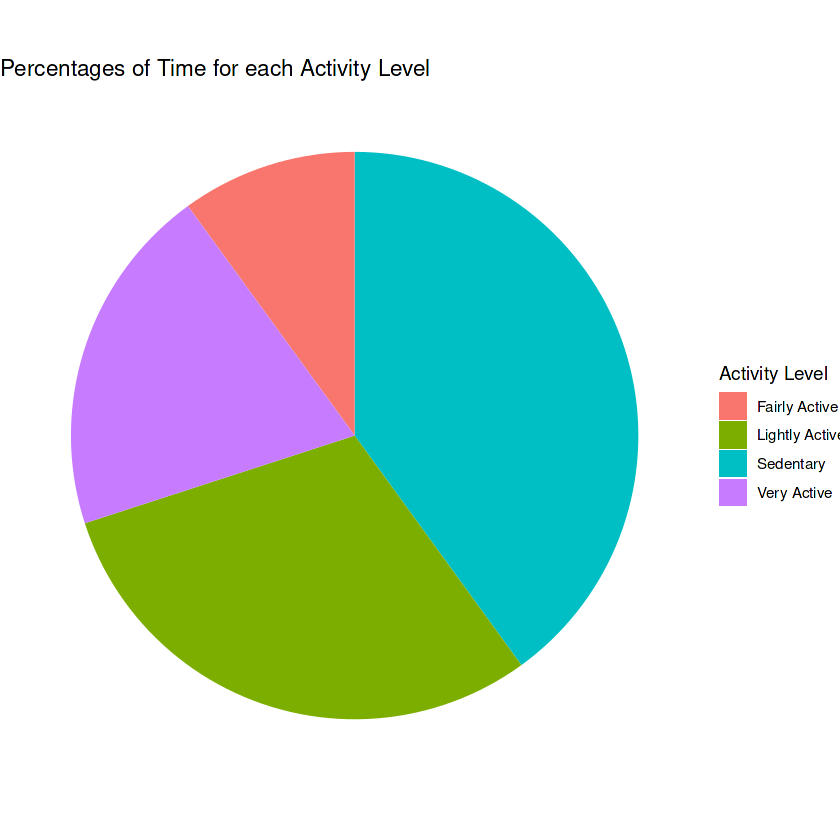

In [7]:
# On average how long was spent on each kind of activity on a daily basis across all participants
# Load scales library to convert decimals to percent
library(scales)
average_activities <- clean_activity %>%
    summarize(
        average_sedentary=mean(SedentaryMinutes),
        average_lightly_active=mean(LightlyActiveMinutes),
        average_fairly_active=mean(FairlyActiveMinutes),
        average_very_active=mean(VeryActiveMinutes),
        total_minutes=sum(average_sedentary, average_lightly_active, average_fairly_active, average_very_active)
    ) %>% 
    mutate(
        sedentary_percent=average_sedentary/total_minutes,
        lightly_active_percent=average_lightly_active/total_minutes,
        fairly_active_percent=average_fairly_active/total_minutes,
        very_active_percent=average_very_active/total_minutes
    )
activity_levels = c("Sedentary","Lightly Active", "Fairly Active", "Very Active")
activity_percentiles = label_percent()(c(average_activities$sedentary_percent, average_activities$lightly_active_percent, average_activities$fairly_active_percent, average_activities$very_active_percent))
activity_data <- data.frame(activity_levels, activity_percentiles)
activity_data
ggplot(data=activity_data, aes(x="", y=activity_percentiles, fill=activity_levels)) +
    geom_bar(width=1, stat="identity") + 
    coord_polar("y", start = 0) +
    labs(title = "Percentages of Time for each Activity Level", fill="Activity Level") +
    theme_void()

The pie chart and percentages show that on average less than 3% of recorded FitBit minutes were either very active or fairly active, further showing that the participants should be getting more exercise. Lastly, let's look at the distribution of average daily very active minutes and sedentary minutes per participant to ensure the mean is a good representation of the overall picture. 

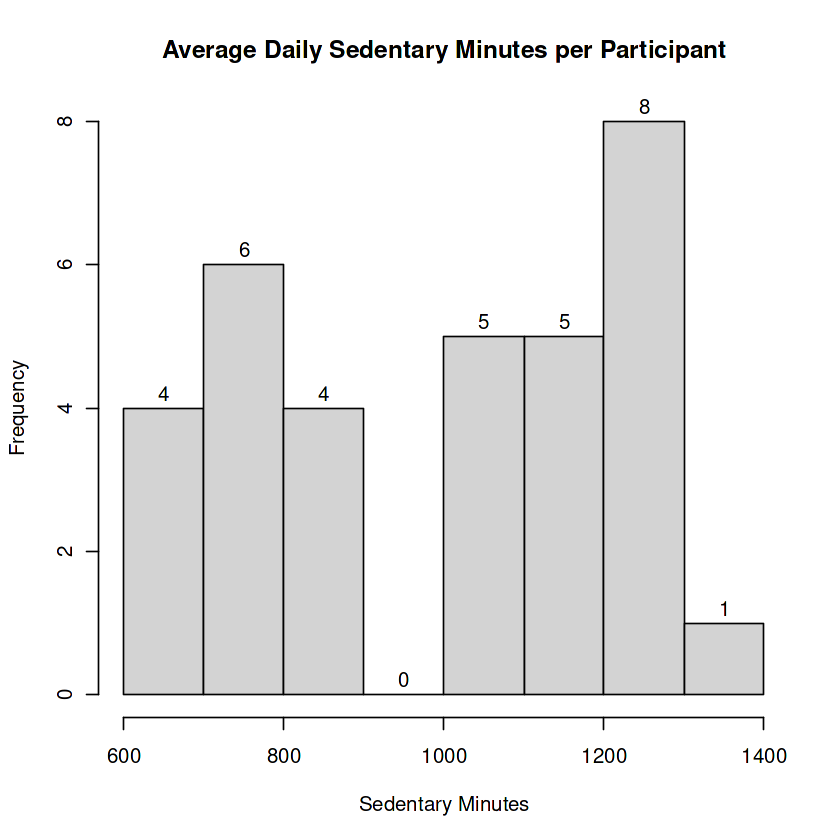

In [8]:
activity_per_user <- clean_activity %>%
    group_by(Id) %>%
    summarize(
            avg_sedentary = mean(SedentaryMinutes), 
            avg_very_active = mean(VeryActiveMinutes)
    )
hist(activity_per_user$avg_sedentary, 
     main="Average Daily Sedentary Minutes per Participant",
     xlab="Sedentary Minutes",
     labels=TRUE)

The distribution across participants for sedentary minutes is slightly skewed to the right with over half of participants averaging 1000 sedentary minutes or more. Over half of the participants had less than 60 very active minutes a day, which is the recommended amount of exercise for adults. Now that we have thoroughly assessed that the participants using FitBit spend too much time sedentary and not enough active we can look into how this impacts other things such as calories, total steps and even sleep. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


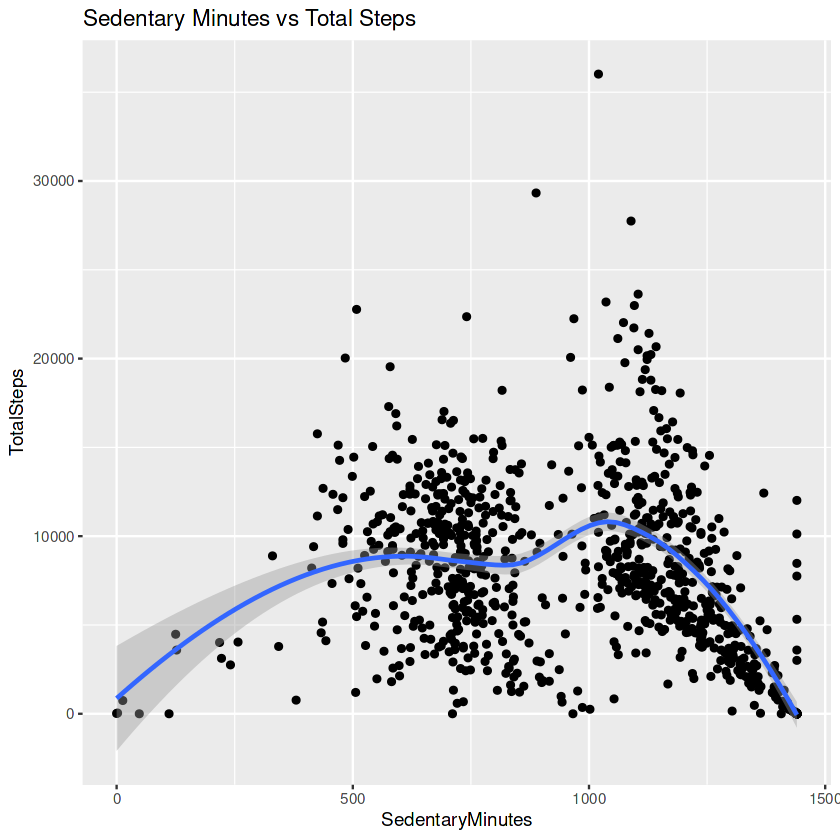

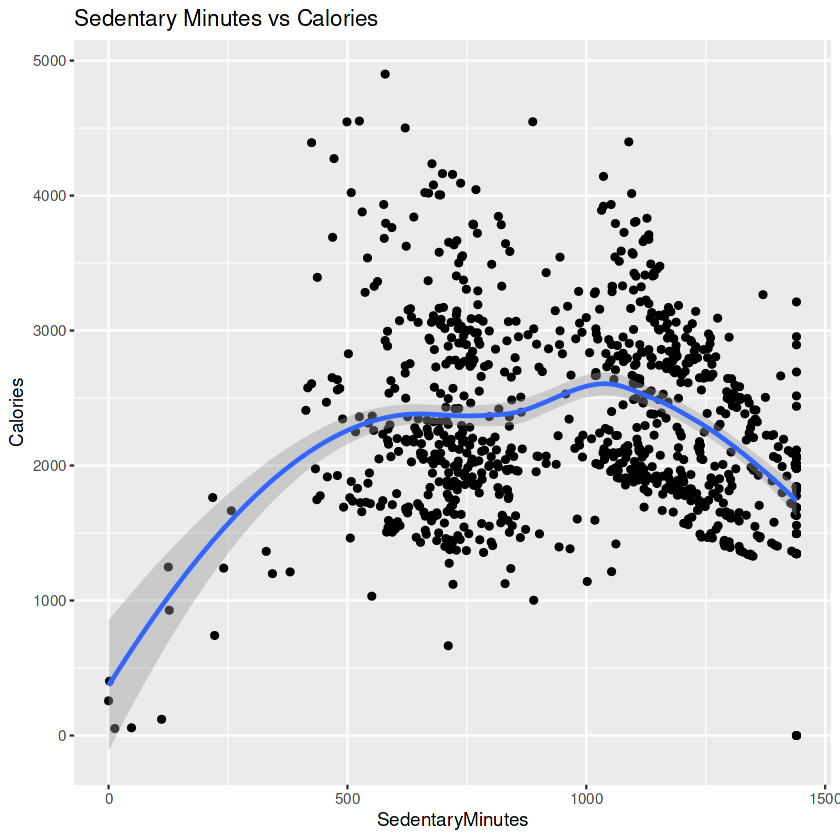

In [9]:
ggplot(data=clean_activity, mapping=aes(x=SedentaryMinutes, y=TotalSteps)) +
    geom_point() +
    geom_smooth() +
    labs(title="Sedentary Minutes vs Total Steps")
ggplot(data=clean_activity, mapping=aes(x=SedentaryMinutes, y=Calories)) +
    geom_point() +
    geom_smooth() +
    labs(title="Sedentary Minutes vs Calories")

The smooth lines for both plots indicate that the two relationships follow the same trend. There is a positive correlation between both variables and the number of sedentary minutes up until the 500 minutes (8 hours) mark. This is likely because participants that recorded extremely low sedentary minutes probably weren’t using their FitBits that much during the study. As a result, the initial positive correlation can be attributed to that up until a certain point, the more data participants recorded the more sedentary minutes, calories and steps they recorded. After about 1000 minutes (16 hours) however, spending that much time sedentary started having negative impacts on the participants’ overall steps and calories burned. To further confirm the cause of the initial positive correlations, let’s look at the distribution of total recorded minutes per participant.

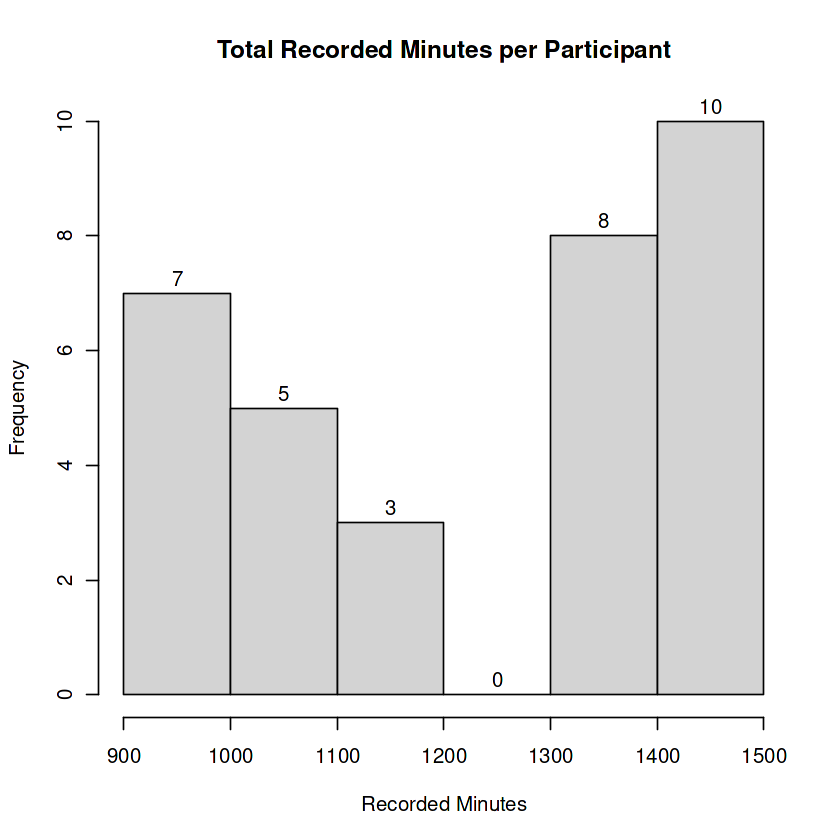

In [10]:
average_reported_minutes <- clean_activity %>%
    group_by(Id) %>%
    summarize(
        average_sedentary=mean(SedentaryMinutes),
        average_lightly_active=mean(LightlyActiveMinutes),
        average_fairly_active=mean(FairlyActiveMinutes),
        average_very_active=mean(VeryActiveMinutes),
        recorded_minutes=sum(average_sedentary, average_lightly_active, average_fairly_active, average_very_active)
    )   
hist(average_reported_minutes$recorded_minutes,
     main="Total Recorded Minutes per Participant",
     xlab="Recorded Minutes",
     labels=TRUE)

We see that some participants would record their activity for the entire 24 hours of the day while others recorded as little as only 15 hours. This confirms the above reasoning as to why as the number of sedentary minutes increased so did calories and total steps at the beginning of the plots. Finally, let’s see if the study showed a change in sedentary or very active minutes for each participant over time. 

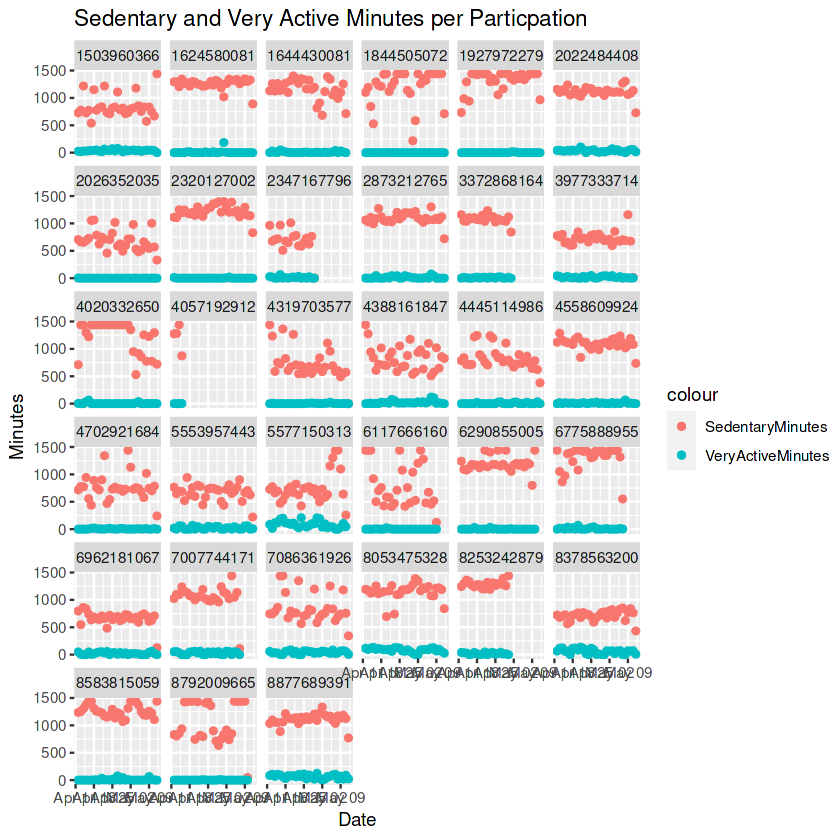

In [11]:
ggplot(data=clean_activity) +
    geom_point(mapping=aes(x=Date, y=SedentaryMinutes, colour="SedentaryMinutes")) + 
    geom_point(mapping=aes(x=Date, y=VeryActiveMinutes, colour="VeryActiveMinutes")) +
    facet_wrap(~Id) +
    labs(title="Sedentary and Very Active Minutes per Particpation", y="Minutes")

We see that over the course of the 21 days in the study the number of sedentary minutes and very active minutes per participant remained steady. This shows us that just simply recording how many minutes are spent in each activity does not motivate users to change their activity levels. Now let’s take a look at the sleep dataset. As a refresher, let’s remind ourselves of the data.

In [12]:
head(clean_sleep)

Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


Two variables that stand out are TotalMinutesAsleep and TotalTimeInBed. We would expect that the relationship between the two should be completely linear but let’s confirm this is true.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


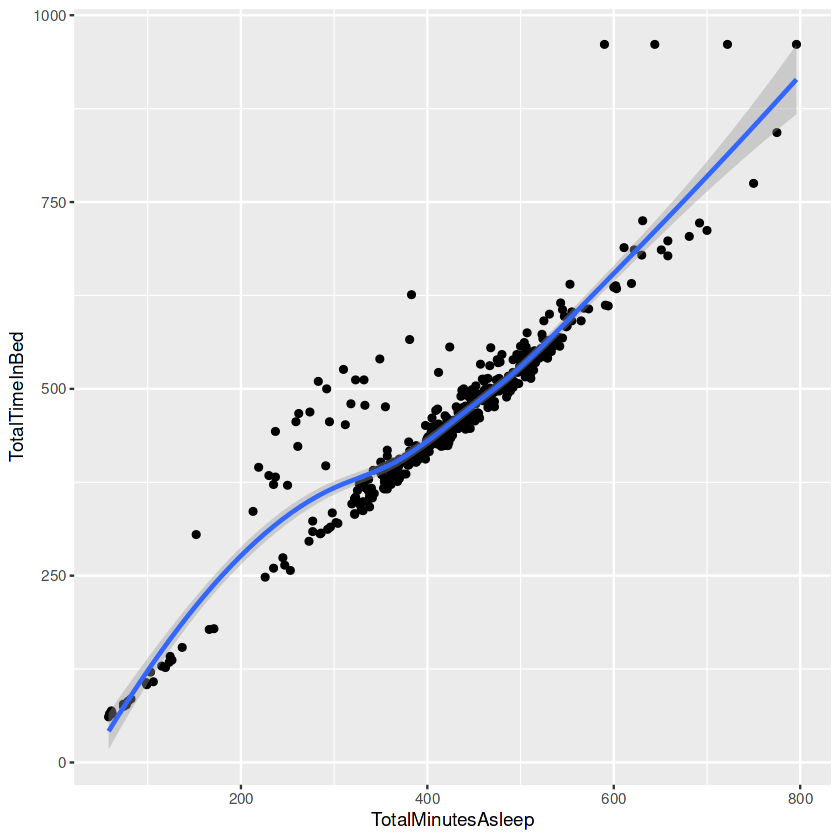

In [13]:
ggplot(data=clean_sleep, mapping=aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) +
    geom_point() +
    geom_smooth()

Let’s see if the time a participant spends asleep affects how long they stay in bed while awake. This could be valuable because we could see if a smart device could encourage individuals to get out of bed faster in the mornings. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


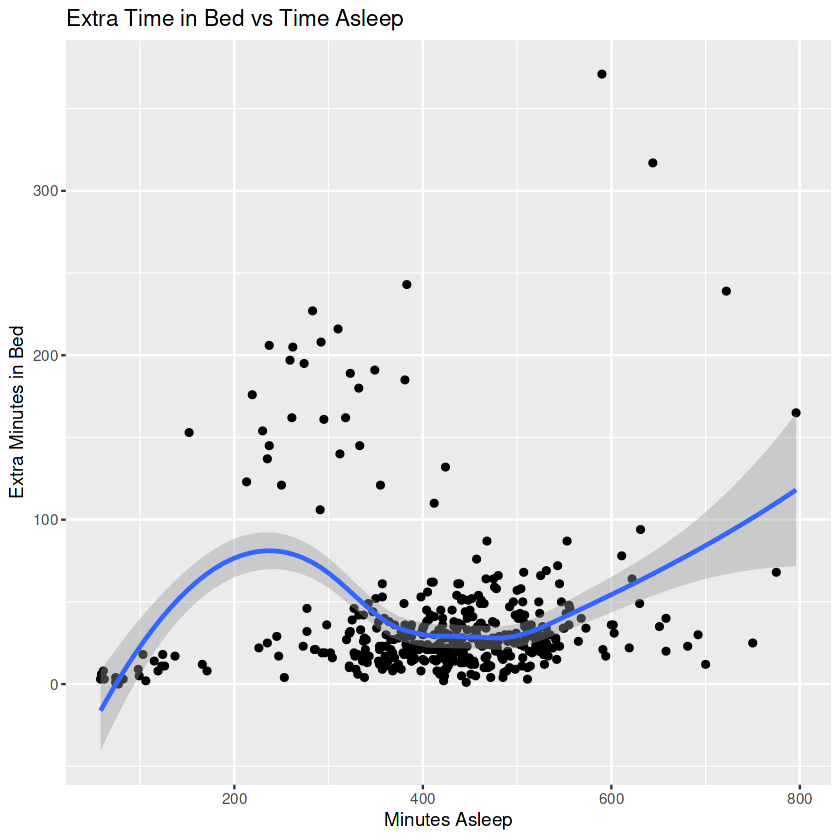

In [14]:
extra_time_in_bed=clean_sleep$TotalTimeInBed-clean_sleep$TotalMinutesAsleep
ggplot(data=clean_sleep, mapping=aes(x=TotalMinutesAsleep, y=extra_time_in_bed)) +
    geom_point() +
    geom_smooth() +
    labs(title="Extra Time in Bed vs Time Asleep", x="Minutes Asleep", y="Extra Minutes in Bed")

We see that the amount of excess time spent asleep is highest for participants that got about 200-300 minutes (3-5 hours) of sleep and for those that got 600 minutes (10 hours) or more of sleep. This shows that participants that got too little or too much sleep were more likely to spend more time lying in bed once awake. Next let’s look at an overall summary of the time spent asleep and its distribution. 

 TotalMinutesAsleep
 Min.   : 58.0     
 1st Qu.:361.0     
 Median :433.0     
 Mean   :419.5     
 3rd Qu.:490.0     
 Max.   :796.0     

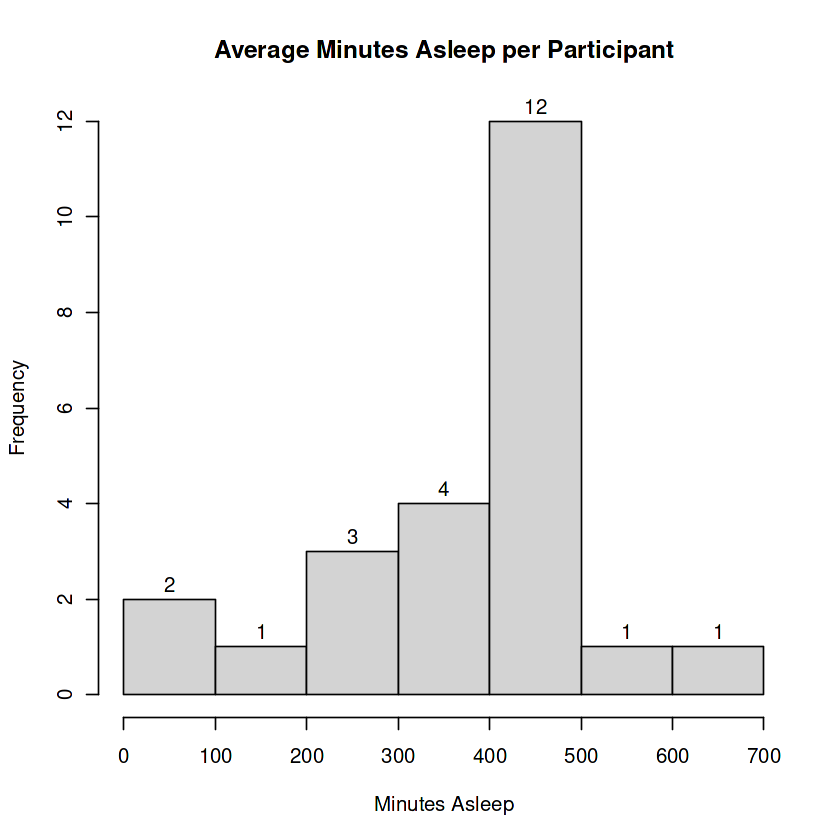

In [15]:
time_asleep <- clean_sleep %>% 
    select(TotalMinutesAsleep) %>% 
    summary()
sleep_per_user <- clean_sleep %>%
    group_by(Id) %>%
    summarize(avg_sleep=mean(TotalMinutesAsleep))
hist(sleep_per_user$avg_sleep,
    main="Average Minutes Asleep per Participant",
    xlab="Minutes Asleep",
    labels=TRUE)
time_asleep

We see that 16 out of the 24 participants get between 6-8 hours of sleep a night, indicating that most are getting a sufficient amount of rest. Now let's combine the two datasets to finish up our analysis.

In [16]:
combined_data <- merge(clean_activity, clean_sleep, by=c("Id","Date"), all=TRUE)
head(combined_data)

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712


Let’s examine the relationships between sleep and the amount of very active and sedentary minutes.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 530 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 530 rows containing missing values (`geom_point()`).”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 530 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 530 rows containing missing values (`geom_point()`).”


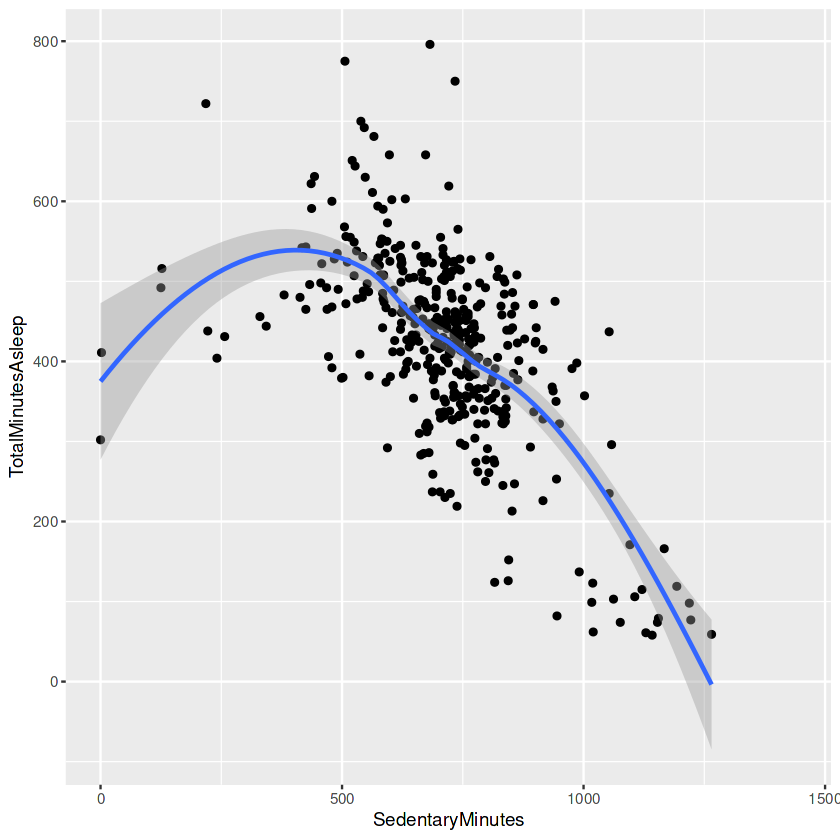

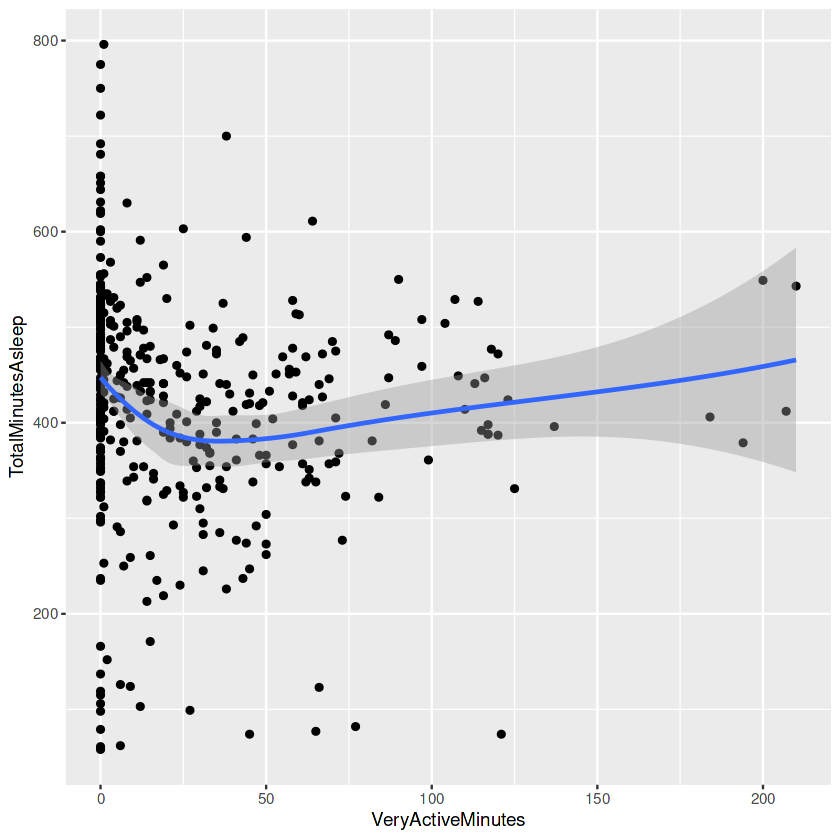

In [17]:
ggplot(combined_data) +
    geom_point(mapping=aes(x=SedentaryMinutes, y=TotalMinutesAsleep)) +
    geom_smooth(mapping=aes(x=SedentaryMinutes, y=TotalMinutesAsleep))
ggplot(combined_data) +
    geom_point(mapping=aes(x=VeryActiveMinutes, y=TotalMinutesAsleep)) +
    geom_smooth(mapping=aes(x=VeryActiveMinutes, y=TotalMinutesAsleep))

We see that there is not much correlation between the amount of sleep a participant gets and the number of minutes they are active but there is a strong negative correlation betwen sleep and the number of minutes they are sedentary. This is likely due to the fact that the less sleep an individual gets the more tired they are and hence will spend more time being sedentary.

## Conclusion

- Overall, the biggest thing we found from analyzing the data is that that the participants are getting much less exercise than they should be.  
- The activity levels also stayed stagnant throughout the course of the study so we can assume that simply having a watch that tracks and reports your activity isn’t enough to change people’s habits. 
- It seems as though there is a strong negative correlation between the amount of sleep an individual gets and the number of sedentary minutes they recorded.  

## Recommendations

- Based on the above conclusions, I believe BellaBeat should be marketed as a way to help people become more active. The marketing team can use the above results to highlight that most individuals aren’t getting enough exercise and can incorporate reminders on their Time product to help solve this.
- As for metrics, we saw that after about 1000 sedentary minutes, the participants’ daily calories and steps were negatively impacted. As a result the reminders should be spaced out to ensure that user is not on track to spend 1000 minutes or more sedentary each day. The marketing team can also include this metric in their advertising as well as how the Time product can help reduce these minutes and thus help users achieve higher overall steps and calories burned per day. 
- Looking at the combined data, the Time product can also have reminders to enforce that the participants get between 6-8 hours of sleep each day as an addition to helping decreasing the amount of time they are sedentary. 